In [21]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
from keras.callbacks import ReduceLROnPlateau
import cv2


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator





In [22]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [23]:
train = get_training_data('/Users/baba/Desktop/chest_xray/train')
test = get_training_data('/Users/baba/Desktop/chest_xray/test')
#val = get_training_data('/Users/baba/Desktop/chest_xray/val')

/var/folders/3t/blq8pnwd2kb723pdpbgkfy4c0000gn/T/ipykernel_12432/9810493.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Text(0.5, 1.0, 'NORMAL')

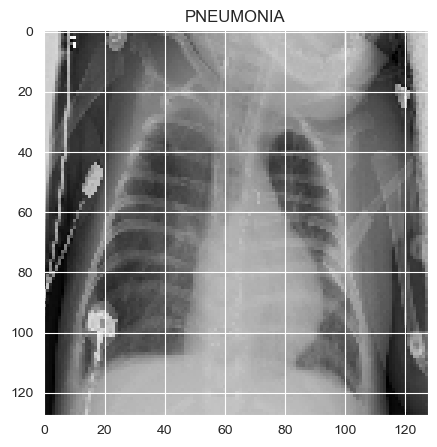

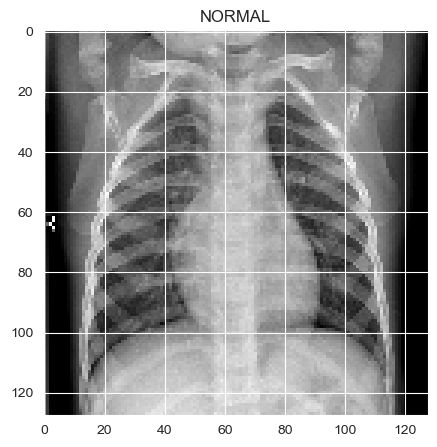

In [24]:
## Visualistion des images dataset

l = []
for i in train:
    if(i[1] == 0):
        l.append('9')
    else:
        l.append('1')
sns.set_style('darkgrid')
#sns.countplot(l)    

plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
## Preparation des dataset

In [25]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
#for feature, label in val:
#    x_val.append(feature)
#    y_val.append(label)
    
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)


#x_val = x_val.reshape(-1, img_size, img_size, 1)
#y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)





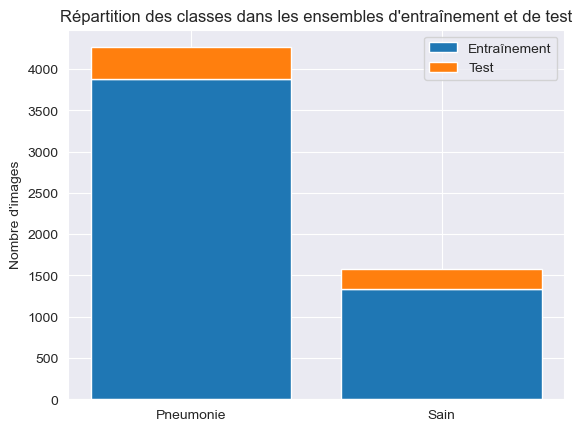

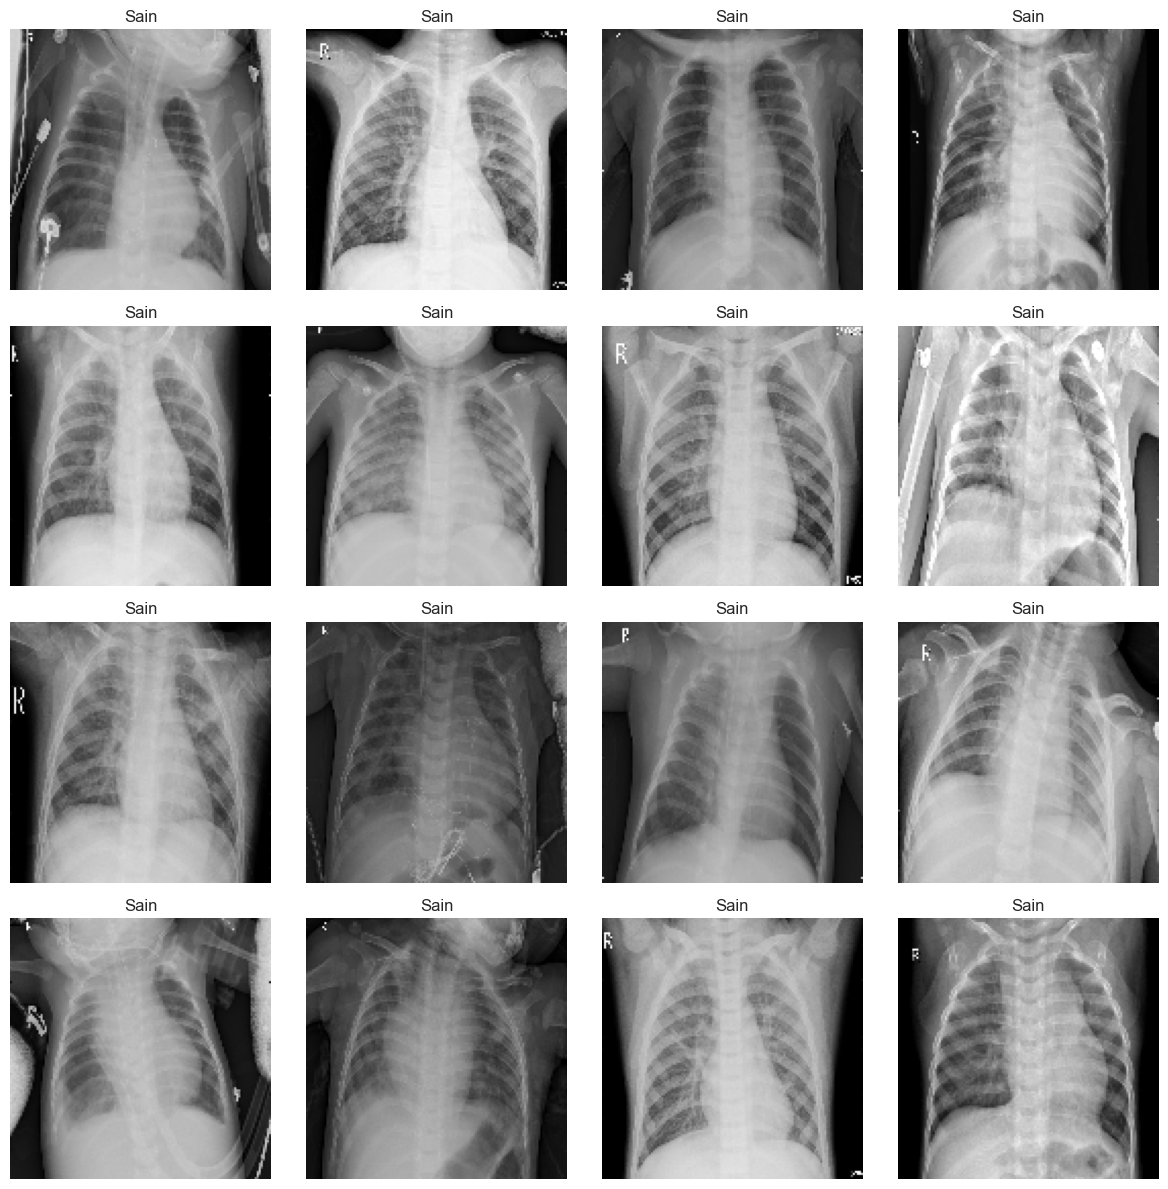

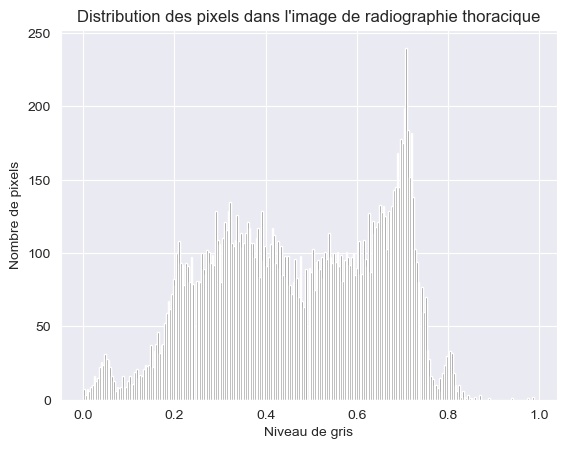

In [61]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque classe dans y_train et y_test
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Créer le graphique à barres
fig, ax = plt.subplots()
ax.bar(['Pneumonie', 'Sain'], train_counts, label='Entraînement')
ax.bar(['Pneumonie', 'Sain'], test_counts, label='Test', bottom=train_counts)
ax.set_ylabel('Nombre d\'images')
ax.set_title('Répartition des classes dans les ensembles d\'entraînement et de test')
ax.legend()
plt.show()

# Définir la taille de la grille
num_rows = 4  # Nombre de lignes
num_cols = 4  # Nombre de colonnes

# Créer la figure et les sous-plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.ravel()  # Transformer le tableau d'axes en un tableau à une dimension

# Parcourir les images du jeu de données et les afficher dans les sous-plots
for i in range(num_rows * num_cols):
    # Charger l'image à partir de votre jeu de données (remplacez par votre propre logique)
    img = x_train[i*100]

    # Afficher l'image dans le sous-plot correspondant
    axes[i].imshow(img, cmap='gray')  # Assurez-vous que cmap='gray' pour les images en niveaux de gris
    axes[i].axis('off')  # Désactiver les axes

    # Ajouter le titre de l'image (remplacez par le label correspondant dans votre jeu de données)
    if y_train[i*100] == 0:
        axes[i].set_title('Sain')
    else:
        axes[i].set_title('Pneumonie')
plt.tight_layout()  # Ajuster la disposition pour éviter les chevauchements
plt.show()


# Créer un histogramme pour la distribution des pixels dans une image d'exemple (remplacez par votre propre logique)
img = x_train[0]  # Charger une image d'exemple (remplacez par l'image que vous souhaitez visualiser)
pixel_values = img.ravel()  # Obtenir les valeurs des pixels dans un tableau à une dimension


# Créer l'histogramme
plt.hist(pixel_values, bins=256, color='gray')  # Utiliser 256 bins pour représenter les niveaux de gris
plt.xlabel('Niveau de gris')  # Label de l'axe x
plt.ylabel('Nombre de pixels')  # Label de l'axe y
plt.title('Distribution des pixels dans l\'image de radiographie thoracique')  # Titre du graphique
plt.show()

## PARTIE 1 : 

In [68]:
## Modèle MLP. 1


mnist_model = Sequential([
  Flatten(input_shape=(128, 128)),
  Dense(128, activation='relu'),
  Dropout(0.1),
  Dense(2, activation='softmax')
])

mnist_model.summary()

mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mnist_model.fit(x_train, y_train, epochs=5)

print("\nEvaluation")
mnist_model.evaluate(x_test, y_test)

max_indices = np.argmax(mnist_model.predict(x_test), axis=1)
mlp_metrics = {'Accuracy': accuracy_score(y_test, max_indices),
              'Precision': precision_score(y_test, max_indices, average='weighted'),
              'Recall': recall_score(y_test, max_indices, average='weighted')}
print(mlp_metrics)


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 16384)             0         
                                                                 
 dense_50 (Dense)            (None, 128)               2097280   
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 2)                 258       
                                                                 
Total params: 2,097,538
Trainable params: 2,097,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
163/163 [==============================] - 1s 6ms/step - loss: 0.4788 - accuracy: 0.8738
Epoch 2/5
163/163 [==============================] - 1s 5ms/step - loss: 0.2

In [55]:
## Modèle MLP 2
Lx = []
Lyloss = []
Lyacc = []
for i in  np.arange(0,10,0.5) : 

    mnist_model = Sequential([
      Flatten(input_shape=(128, 128)),
      Dense(128, activation='relu'),
        Dropout(i/10), # Prend un nombre entre 0 et 1
      Dense(2, activation='softmax')
    ])

    mnist_model.compile(optimizer=optimizers.RMSprop(1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    mnist_model.fit(x_train, y_train, epochs=5)

    #print("\nEvaluation")
    a = mnist_model.evaluate(x_test, y_test)
    Lx.append(i/10)
    Lyloss.append(a[0])
    Lyacc.append(a[1])
    
    
plt.plot(Lx,Lyloss, label='loss')
plt.plot(Lx,Lyacc, label ='acc')
plt.legend()
plt.show()
    

AttributeError: module 'tensorflow.python.keras.optimizers' has no attribute 'RMSprop'

In [69]:
# Création d'un modèle MLP simple
model = Sequential([
  Flatten(input_shape=(128, 128)),
  Dense(128, activation='relu'),
    #Dropout(0.1),
    Dense(64, activation='relu'),
  Dense(2, activation='sigmoid') ## Quand on utilise softmax accurancy sur le test desend à 30%
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Entraînement du modèle
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)


max_indices = np.argmax(mnist_model.predict(x_test), axis=1)
mlp_metrics = {'Accuracy': accuracy_score(y_test, max_indices),
              'Precision': precision_score(y_test, max_indices, average='weighted'),
              'Recall': recall_score(y_test, max_indices, average='weighted')}


Epoch 1/5
163/163 [==============================] - 1s 7ms/step - loss: 0.5153 - accuracy: 0.8391 - val_loss: 0.5766 - val_accuracy: 0.7548
Epoch 2/5
163/163 [==============================] - 1s 6ms/step - loss: 0.2009 - accuracy: 0.9202 - val_loss: 1.4127 - val_accuracy: 0.6715
Epoch 3/5
163/163 [==============================] - 1s 6ms/step - loss: 0.1508 - accuracy: 0.9442 - val_loss: 0.9469 - val_accuracy: 0.7244
Epoch 4/5
163/163 [==============================] - 1s 6ms/step - loss: 0.1376 - accuracy: 0.9490 - val_loss: 0.5873 - val_accuracy: 0.7917
Epoch 5/5
20/20 [==============================] - 0s 2ms/step


## Modèle CNN

In [54]:
# Modèle CNN

# Création d'un modèle CNN simple
model = Sequential([
  Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)),
  BatchNormalization(),
  MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  Dropout(0.1),
  BatchNormalization(),
  MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  BatchNormalization(),
  MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  Flatten(),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(2, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Entraînement du modèle
model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

model.save('cnn.h5')

max_indices = np.argmax(model.predict(x_test), axis=1)
cnn_metrics = {'Accuracy': accuracy_score(y_test, max_indices),
              'Precision': precision_score(y_test, max_indices, average='weighted'),
              'Recall': recall_score(y_test, max_indices, average='weighted')}

Epoch 1/6
163/163 [==============================] - 51s 310ms/step - loss: 0.4907 - accuracy: 0.8593 - val_loss: 16.7069 - val_accuracy: 0.6250
Epoch 2/6
163/163 [==============================] - 55s 335ms/step - loss: 0.1336 - accuracy: 0.9540 - val_loss: 11.6686 - val_accuracy: 0.6250
Epoch 3/6
163/163 [==============================] - 57s 348ms/step - loss: 0.0978 - accuracy: 0.9703 - val_loss: 3.1059 - val_accuracy: 0.6394
Epoch 4/6
163/163 [==============================] - 54s 332ms/step - loss: 0.0898 - accuracy: 0.9711 - val_loss: 4.5168 - val_accuracy: 0.6282
Epoch 5/6
163/163 [==============================] - 58s 356ms/step - loss: 0.0715 - accuracy: 0.9793 - val_loss: 3.7143 - val_accuracy: 0.6426
Epoch 6/6
20/20 [==============================] - 2s 85ms/step


## Modèle SVM

In [57]:
# Modèle SVM

from sklearn.svm import SVC
import numpy as np

# Aplatir chaque image en une seule dimension
x_train_flat = np.reshape(x_train, (x_train.shape[0], -1))
x_test_flat = np.reshape(x_test, (x_test.shape[0], -1))

# Création d'un modèle SVM simple
model = SVC(kernel='linear', C=3, gamma='scale')

# Entraînement du modèle
model.fit(x_train_flat, y_train)

# Évaluation du modèle
score = model.score(x_test_flat, y_test)
print(f"Accuracy: {score}")

max_indices = model.predict(x_test_flat)
svm_metrics = {'Accuracy': accuracy_score(y_test, max_indices),
              'Precision': precision_score(y_test, max_indices, average='weighted'),
              'Recall': recall_score(y_test, max_indices, average='weighted')}


Accuracy: 0.75


## Regression Logistique

In [43]:
from sklearn.linear_model import LogisticRegression

# Création d'un modèle de régression logistique simple
model = LogisticRegression()

# Entraînement du modèle
model.fit(x_train_flat, y_train)

# Évaluation du modèle
score = model.score(x_test_flat, y_test)
print(f"Accuracy: {score}")


max_indices = model.predict(x_test_flat)
reg_metrics = {'Accuracy': accuracy_score(y_test, max_indices),
              'Precision': precision_score(y_test, max_indices, average='weighted'),
              'Recall': recall_score(y_test, max_indices, average='weighted')}

Accuracy: 0.7419871794871795


/Users/baba/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Classifieur Bayésien Naif

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Création du classifieur Bayésien naïf
model = GaussianNB()

# Entraînement du modèle
model.fit(x_train_flat, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(x_test_flat)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


max_indices = model.predict(x_test_flat)
bay_metrics = {'Accuracy': accuracy_score(y_test, max_indices),
              'Precision': precision_score(y_test, max_indices, average='weighted'),
              'Recall': recall_score(y_test, max_indices, average='weighted')}

Accuracy: 0.7259615384615384


### Partie 2 :  2eme pré-traitement

In [ ]:
#Bayes améiorer V1
#Optimisation des hyperparamètres

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Définition du modèle
model = GaussianNB()

# Définition des hyperparamètres à optimiser
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Recherche par grille des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train_flat, y_train)

# Affichage des meilleurs hyperparamètres
print(grid_search.best_params_)

# Évaluation du modèle avec les meilleurs hyperparamètres
score = grid_search.score(x_test_flat, y_test)
print(f"Accuracy: {score}")

In [ ]:
#Bayes améiorer V2 
# Rajout d'un pé-traitement par Analyse de Composante Principale

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Création d'un objet PCA pour extraire les caractéristiques
pca = PCA(n_components=50)

# Application de PCA sur les données d'entraînement et de test
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Création d'un objet Classifier de Bayes Naïf
model = GaussianNB()

# Entraînement du modèle avec les données d'entraînement PCA
model.fit(x_train_pca, y_train)

# Évaluation du modèle avec les données de test PCA
score = model.score(x_test_pca, y_test)
print(f"Accuracy: {score}")

In [ ]:
## Regression Logistique 
# avec Analyse par Composante Principale


# Création d'un modèle de régression logistique simple
model = LogisticRegression()

# Entraînement du modèle
model.fit(x_train_pca, y_train)

# Évaluation du modèle
score = model.score(x_test_pca, y_test)
print(f"Accuracy: {score}")

In [73]:
## Regression Logistique 
# avec Analyse par Composante Principale et Optimisation des hyperparamètre

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Création d'un pipeline pour la régression logistique avec PCA
logistic_pipeline = make_pipeline(StandardScaler(), PCA(), LogisticRegression())

# Définition des hyperparamètres à optimiser
param_grid = {
    'pca__n_components': [2, 5, 10],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.1, 1, 10]
}

# Recherche des meilleurs hyperparamètres avec la validation croisée
grid_search = GridSearchCV(logistic_pipeline, param_grid=param_grid, cv=5)
grid_search.fit(x_train_flat, y_train) 

# Affichage des meilleurs hyperparamètres et de la performance
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Performance : ", grid_search.best_score_)

/Users/baba/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/baba/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/baba/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/baba/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver

Meilleurs hyperparamètres :  {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'pca__n_components': 10}
Performance :  0.92906495777359


In [75]:
## Regression Logistique 
# avec Analyse par Composante Principale et Avec les hyperparamètre de l'optimisation précedente

#Meilleurs hyperparamètres :  {'logisticregression__C': 0.1, 
#                              'logisticregression__penalty': 'l2', 
#                              'pca__n_components': 10}
#Performance :  0.92906495777359


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Création du pipeline pour la régression logistique avec PCA
logistic_pipeline = make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(C=0.1, penalty='l2'))

# Entraînement du modèle
logistic_pipeline.fit(x_train_flat, y_train)

# Évaluation du modèle
score = logistic_pipeline.score(x_test_flat, y_test)
print(f"Accuracy: {score}")
#Accuracy: 0.7676282051282052

Accuracy: 0.7676282051282052


In [77]:
## Modèle KNN avec Optimisation des paramètre et PCA

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Création du pipeline avec PCA, KNN et une transformation de distance de Manhattan à Euclidienne
knn_pipeline = make_pipeline(StandardScaler(), PCA(), KNeighborsClassifier(metric='euclidean'))

# Définition des hyperparamètres à optimiser
param_grid = {
    'pca__n_components': [2, 5, 10],
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

# Recherche par grille des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, cv=5)
grid_search.fit(x_train_flat, y_train)

# Affichage des meilleurs hyperparamètres
print(grid_search.best_params_)

# Évaluation du modèle avec les meilleurs hyperparamètres
score = grid_search.score(x_test_flat, y_test)
print(f"Accuracy: {score}")

{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'uniform', 'pca__n_components': 10}
Accuracy: 0.8076923076923077


In [ ]:
## MLP 
# avec Analyse par Composante Principale



# Création d'un modèle MLP simple
model = Sequential([
  Dense(128, activation='relu'),
    Dropout(0.1),
  Dense(64, activation='relu'),
  Dense(2, activation='sigmoid') ## Quand on utilise softmax accurancy sur le test desend à 30%
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Entraînement du modèle
model.fit(x_train_pca, y_train, epochs=5, validation_data=(x_test_pca, y_test))
model.evaluate(x_test_pca, y_test)

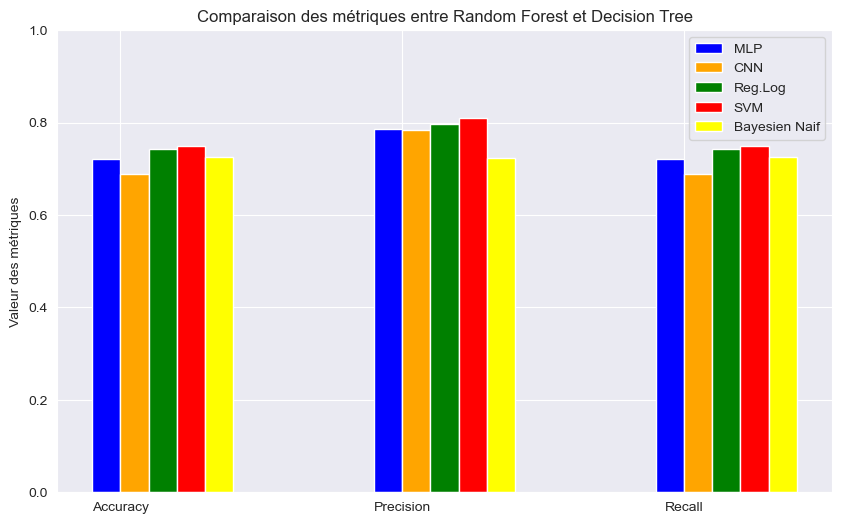

In [70]:
#Graphe bilan


# Préparer les données pour le graphique en bâton
labels = list(mlp_metrics.keys())
mlp_values = list(mlp_metrics.values())
cnn_values = list(cnn_metrics.values())
reg_values = list(reg_metrics.values())
svm_values = list(svm_metrics.values())
bay_values = list(bay_metrics.values())


x = np.arange(len(labels))  # localisation des labels sur l'axe des x
width = 0.1  # largeur des barres

# Créer le graphique en bâton
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width / 2, mlp_values, width, label='MLP', color='blue')
rects2 = ax.bar(x + width / 2, cnn_values, width, label='CNN', color='orange')
rects3 = ax.bar(x + 3*width / 2, reg_values, width, label='Reg.Log', color='green')
rects4 = ax.bar(x + 5*width / 2, svm_values, width, label='SVM', color='red')
rects5 = ax.bar(x + 7*width / 2, bay_values, width, label='Bayesien Naif', color='yellow')


# Ajouter du texte pour les labels, titre et légende
ax.set_ylabel('Valeur des métriques')
ax.set_title('Comparaison des métriques entre Random Forest et Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
ax.legend()

plt.show()